In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import HW4_utils_data as utils
from scipy.optimize import minimize

In [260]:
X_train = np.array([1.71, 2.33, 4.33, 4.84, 4.86, 5.54])
Y_train = np.array([-0.2138, -1.0389, 0.7630, -0.2271, -0.2733, -1.0565])
n = X_train.shape[0]
theta1, theta2, theta3, var_e = 0.716897867493508,0.4950998524533323,1e-18,1e-18

In [261]:
X, Y = X_train, Y_train
X = X.reshape((len(X),1))
K = X - X.T
K = theta1*np.exp(-K**2/(2*theta2)) + np.eye(n)*theta3       
C_N = K + np.eye(n)*var_e

# Prediction

In [262]:
def kronecker_delta_vectorized(scalar, vector):
    return np.where(vector == scalar, 1, 0)

Predicting on original training points

In [263]:
Y_tilde = np.zeros((X_train.shape[0],1))

for i in range(len(X_train)):
    print(i)
    x_new = X_train[i]
    k_new = theta1*np.exp(-(x_new - X_train)**2/(2*theta2))
    k_new[i] += theta3
    k_new = k_new.reshape(len(k_new),1)

    L = np.linalg.cholesky(C_N)
    
    Y_tilde[i] = k_new.T @ np.linalg.solve(L.T, np.linalg.solve(L, Y_train))

0
1
2
3
4
5


Predicting on x* = [1,6]

In [264]:
x_eval = np.linspace(1,6,1000)
mean = np.zeros((x_eval.shape[0],1))
variance = np.zeros((x_eval.shape[0],1))

for i in range(len(x_eval)):
    print(i)
    x_new = x_eval[i]
    k_new = theta1*np.exp(-(x_new - X_train)**2/(2*theta2))
    k_new = k_new + kronecker_delta_vectorized(x_new, X_train)*theta3
    c_scalar = theta1 + theta3

    L = np.linalg.cholesky(C_N)
    
    mean[i] = k_new.T @ np.linalg.solve(L.T, np.linalg.solve(L, Y_train))
    variance[i] = c_scalar - k_new.T @ np.linalg.solve(L.T, np.linalg.solve(L, k_new))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Training using new training data

In [293]:
n = Y_tilde.shape[0]

def neg_log_likelihood(params):
    print(params)
    theta1, theta2, theta3, var_e = params
    X, Y = Y_tilde, Y_train
    X = X.reshape((n,1))
    Y = Y.reshape((n,1))
    K = X - X.T
    K = theta1*np.exp(-K**2/(2*theta2)) + np.eye(n)*theta3

    try:        
        C_N = K + np.eye(n)*var_e
        L = np.linalg.cholesky(C_N)
        alpha = np.linalg.solve(L.T, np.linalg.solve(L, Y))
        log_likelihood = n*0.5*np.log(2*np.pi) + np.sum(np.log(np.diag(L))) + 0.5*(Y.T@alpha)
    except np.linalg.LinAlgError:
        log_likelihood = np.inf
        
    return log_likelihood

initial_params = [26,65,10,10]

result = minimize(neg_log_likelihood, initial_params, bounds=[(1e-18, None), (1e-18, None), (1e-18, None), (1e-18, None)])
theta1, theta2, theta3, var_e = result.x
print(result.fun)

[26. 65. 10. 10.]
[26.00000001 65.         10.         10.        ]
[26.         65.00000001 10.         10.        ]
[26.         65.         10.00000001 10.        ]
[26.         65.         10.         10.00000001]
[25.98230109 65.000251    9.87579998  9.87579998]
[25.9823011  65.000251    9.87579998  9.87579998]
[25.98230109 65.00025101  9.87579998  9.87579998]
[25.98230109 65.000251    9.87579999  9.87579998]
[25.98230109 65.000251    9.87579998  9.87579999]
[25.96455955 65.00050484  9.75011013  9.75011013]
[25.96455956 65.00050484  9.75011013  9.75011013]
[25.96455955 65.00050485  9.75011013  9.75011013]
[25.96455955 65.00050484  9.75011014  9.75011013]
[25.96455955 65.00050484  9.75011013  9.75011014]
[25.89359339 65.00152021  9.24735074  9.24735074]
[25.8935934  65.00152021  9.24735074  9.24735074]
[25.89359339 65.00152022  9.24735074  9.24735074]
[25.89359339 65.00152021  9.24735075  9.24735074]
[25.89359339 65.00152021  9.24735074  9.24735075]
[25.60972875 65.00558167  7.2363

In [294]:
print(result.x)

[2.45882991e+01 6.50201960e+01 1.00000000e-18 1.00000000e-18]


In [295]:
X, Y = Y_tilde, Y_train
X = X.reshape((len(X),1))
K = X - X.T
K = theta1*np.exp(-K**2/(2*theta2)) + np.eye(n)*theta3       
C_N = K + theta3*np.eye(n)

In [296]:
C_N

array([[24.58829908, 24.4599103 , 24.40854894, 24.58826563, 24.58762969,
        24.45438972],
       [24.4599103 , 24.58829908, 23.98198013, 24.46400561, 24.47771931,
        24.58824051],
       [24.40854894, 23.98198013, 24.58829908, 24.40363925, 24.38607672,
        23.97022873],
       [24.58826563, 24.46400561, 24.40363925, 24.58829908, 24.5878955 ,
        24.45857216],
       [24.58762969, 24.47771931, 24.38607672, 24.5878955 , 24.58829908,
        24.47258887],
       [24.45438972, 24.58824051, 23.97022873, 24.45857216, 24.47258887,
        24.58829908]])

In [297]:
mean

array([[ 2.74990425e-01],
       [ 2.75179633e-01],
       [ 2.75332164e-01],
       [ 2.75447507e-01],
       [ 2.75525156e-01],
       [ 2.75564605e-01],
       [ 2.75565352e-01],
       [ 2.75526893e-01],
       [ 2.75448730e-01],
       [ 2.75330364e-01],
       [ 2.75171300e-01],
       [ 2.74971045e-01],
       [ 2.74729108e-01],
       [ 2.74445002e-01],
       [ 2.74118242e-01],
       [ 2.73748346e-01],
       [ 2.73334836e-01],
       [ 2.72877236e-01],
       [ 2.72375074e-01],
       [ 2.71827882e-01],
       [ 2.71235195e-01],
       [ 2.70596554e-01],
       [ 2.69911501e-01],
       [ 2.69179584e-01],
       [ 2.68400356e-01],
       [ 2.67573373e-01],
       [ 2.66698197e-01],
       [ 2.65774394e-01],
       [ 2.64801535e-01],
       [ 2.63779197e-01],
       [ 2.62706962e-01],
       [ 2.61584416e-01],
       [ 2.60411153e-01],
       [ 2.59186771e-01],
       [ 2.57910875e-01],
       [ 2.56583075e-01],
       [ 2.55202989e-01],
       [ 2.53770241e-01],
       [ 2.5

# GPR 2 Prediction

In [298]:
x_eval = np.linspace(1,6,1000)
Mean = np.zeros((x_eval.shape[0],1))
Variance = np.zeros((x_eval.shape[0],1))
L = np.linalg.cholesky(C_N)

for i in range(len(x_eval)):
    print(i)
    x_new = mean[i]
    
    k_new = theta1*np.exp(-(x_new - Y_tilde)**2/(2*theta2))
    k_new = k_new + kronecker_delta_vectorized(x_new, Y_tilde)*theta3
    k_new = k_new.reshape(len(k_new),1)
    c_scalar = theta1 + theta3
    
    Mean[i] = k_new.T @ np.linalg.solve(L.T, np.linalg.solve(L, Y_train))
    Variance[i] = c_scalar - k_new.T @ np.linalg.solve(L.T, np.linalg.solve(L, k_new))
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617


In [299]:
Std_dev = np.sqrt(Variance)
L = Mean-2*Std_dev
U = Mean+2*Std_dev
L = np.ravel(L)
U = np.ravel(U)
Y_true = np.sin(2*x_eval)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12848\3224140642.py:1: RuntimeWarning: invalid value encountered in sqrt
  Std_dev = np.sqrt(Variance)


In [300]:
Mean

array([[ 2.74993390e-01],
       [ 2.75182977e-01],
       [ 2.75334793e-01],
       [ 2.75450288e-01],
       [ 2.75528425e-01],
       [ 2.75567429e-01],
       [ 2.75568505e-01],
       [ 2.75529769e-01],
       [ 2.75451623e-01],
       [ 2.75333156e-01],
       [ 2.75174329e-01],
       [ 2.74973555e-01],
       [ 2.74731989e-01],
       [ 2.74447695e-01],
       [ 2.74121294e-01],
       [ 2.73751149e-01],
       [ 2.73337281e-01],
       [ 2.72880215e-01],
       [ 2.72377801e-01],
       [ 2.71830493e-01],
       [ 2.71237911e-01],
       [ 2.70599379e-01],
       [ 2.69913954e-01],
       [ 2.69182419e-01],
       [ 2.68403325e-01],
       [ 2.67576258e-01],
       [ 2.66700680e-01],
       [ 2.65777065e-01],
       [ 2.64804630e-01],
       [ 2.63781856e-01],
       [ 2.62709605e-01],
       [ 2.61587048e-01],
       [ 2.60413759e-01],
       [ 2.59189334e-01],
       [ 2.57913742e-01],
       [ 2.56585511e-01],
       [ 2.55205523e-01],
       [ 2.53772638e-01],
       [ 2.5

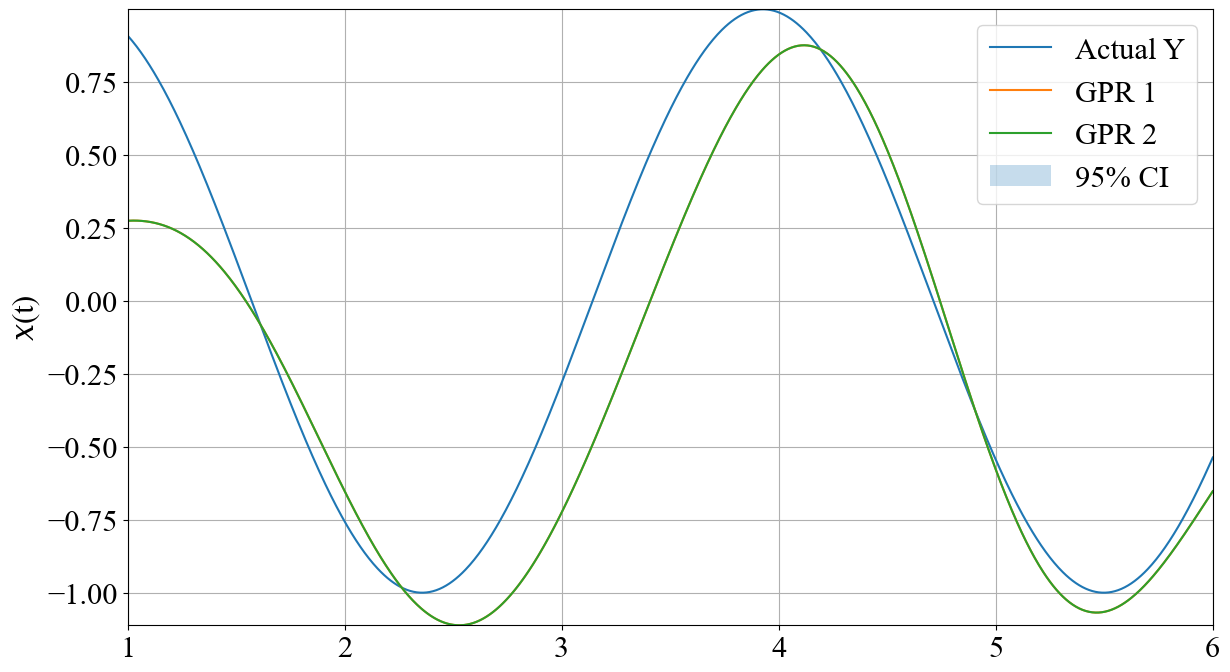

In [308]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 22
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

fig1 = plt.figure(figsize=(14,8), dpi=100)
plt.plot(x_eval, Y_true, label = 'Actual Y'); plt.ylabel('$x$(t)');
plt.grid(True); plt.legend(loc=1); plt.margins(0)

plt.plot(x_eval, mean, label = 'GPR 1'); plt.ylabel('$x$(t)');
plt.grid(True); plt.legend(loc=1); plt.margins(0)

plt.plot(x_eval, Mean, label = 'GPR 2'); plt.ylabel('$x$(t)');
plt.grid(True); plt.legend(loc=1); plt.margins(0)

plt.fill_between(x_eval, L, U , label = '95% CI', alpha=0.25)
plt.grid(True); plt.legend(loc=1); plt.margins(0)

plt.show()

In [312]:
Mean = np.ravel(Mean)

In [313]:
predictive_error = abs(Mean - Y_true)
predictive_error

array([6.34304036e-01, 6.29903330e-01, 6.25449705e-01, 6.20942142e-01,
       6.16382120e-01, 6.11771861e-01, 6.07110621e-01, 6.02400747e-01,
       5.97642316e-01, 5.92836722e-01, 5.87984499e-01, 5.83087733e-01,
       5.78145782e-01, 5.73161102e-01, 5.68133599e-01, 5.63065446e-01,
       5.57957169e-01, 5.52808793e-01, 5.47623031e-01, 5.42400000e-01,
       5.37140658e-01, 5.31846267e-01, 5.26518364e-01, 5.21156769e-01,
       5.15763542e-01, 5.10339714e-01, 5.04886451e-01, 4.99403911e-01,
       4.93893521e-01, 4.88357449e-01, 4.82795491e-01, 4.77209138e-01,
       4.71599491e-01, 4.65967633e-01, 4.60314281e-01, 4.54641602e-01,
       4.48949416e-01, 4.43239571e-01, 4.37512525e-01, 4.31770264e-01,
       4.26013001e-01, 4.20242717e-01, 4.14459168e-01, 4.08664470e-01,
       4.02859835e-01, 3.97045989e-01, 3.91223532e-01, 3.85394613e-01,
       3.79559339e-01, 3.73719427e-01, 3.67875611e-01, 3.62028596e-01,
       3.56180682e-01, 3.50331751e-01, 3.44482854e-01, 3.38636277e-01,
      